### shit in - shit out


In [4]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn import preprocessing as prep
from scipy import stats

*Нормировка данных*

- нужна 1) для того, чтобы коэф-ты регрессии были одного масштаба. Чтобы все факторы были в одной шкале.
К примеру, все коэф-ты от 1 до 5.
Таким образом можно наглядно сравнивать влияние коэф-тов
- 2) С нормальным распределением легче работать регрессии

равномерное распределение - числа выпадают с равной вероятностью

нормальное - числа кучкуются к центру

!!! Нормализация не приводит распределение к нормальному



Бета распределение
- например спам-не спам (то есть некая серая зона, а по краям большие области спам или не спам)
- например доход населения (посередине исчезающий средний класс)

In [11]:
data_stats = stats.beta(1, 10).rvs(10)
print (data_stats)
print (data_stats.reshape(10, 1)) # преврвщаем из одномерного в двумерный

[0.00289366 0.03607445 0.16623996 0.0729493  0.05777539 0.05121389
 0.01204724 0.04156389 0.05629194 0.12174487]
[[0.00289366]
 [0.03607445]
 [0.16623996]
 [0.0729493 ]
 [0.05777539]
 [0.05121389]
 [0.01204724]
 [0.04156389]
 [0.05629194]
 [0.12174487]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


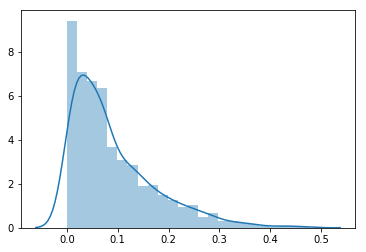

In [13]:
data = stats.beta(1, 10).rvs(1000).reshape(1000, 1)
sns.distplot(data)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


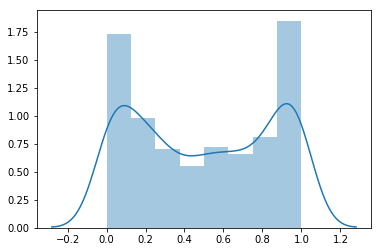

In [14]:
data = stats.beta(0.5, 0.5).rvs(1000).reshape(1000, 1)
sns.distplot(data)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


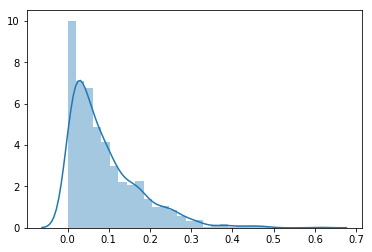

In [15]:
data = stats.beta(1, 10).rvs(1000).reshape(1000, 1)
sns.distplot(data)

### 1. z-score нормировка (StandardScaler)
Центрируем выборку относительно среднего и делим на стандартное отклонение.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


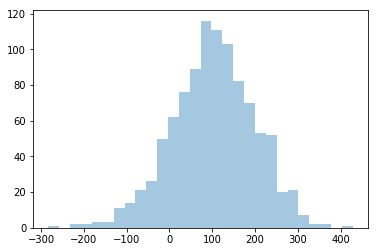

In [26]:
sns.distplot(np.random.normal(100, 100, size=1000), kde=False)
sns.distplot

### Проверка, нормальное ли распределение
С нормальным распределением легче работать регрессии

Для того, чтобы понять, является ли распределение нормальным, есть критерий Шапиро

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


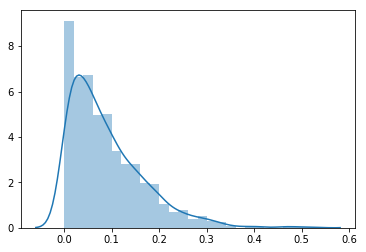

(0.8766709566116333, 2.0908380810613818e-27)
значение статистики, p_value


In [29]:
data = stats.beta(1, 10).rvs(1000).reshape(1000, 1)
sns.distplot(data)
plt.show()
print(stats.shapiro(data))
print('значение статистики, p_value')

##### StandardScaler - данные центрируем около 0 и стандартное отклонение = 1

(0.8766709566116333, 2.0908380810613818e-27)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


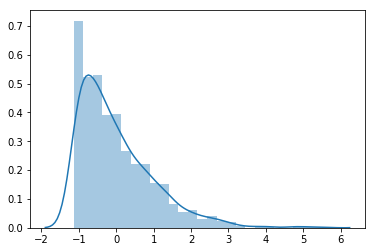

In [32]:
print(stats.shapiro(preprocessing.StandardScaler().fit_transform(data)))
sns.distplot(preprocessing.StandardScaler().fit_transform(data))

### 2. MinMaxScaler

приводит все числа к значениям от 0 до 1.
Если есть выбросы, то используют StandardScaler

Вообще, чаще всего используют StandardScaler

### Логнормальное распределение

Можно привести к нормальному, взяв логарифм

### L1 , L2 нормализация

In [36]:
import demo

In [38]:
x_data, y_data = demo.get_data()

In [39]:
x_data.head(5)

,bathrooms,bedrooms,price,dishwasher,doorman,pets,air_conditioning,parking,balcony,bike,...,stainless,simplex,public,num_photos,num_features,listing_age,room_dif,room_sum,price_per_room,bedrooms_share
10,1.5,3,8.006368,0,0,0,0,0,0,0,...,0,0,0,5,0,1106,1.5,4.5,666.666667,0.666667
10000,1.0,2,8.606119,0,1,1,0,0,0,0,...,0,0,0,11,57,1118,1.0,3.0,1821.666667,0.666667
100004,1.0,1,7.955074,1,0,1,0,0,0,0,...,0,0,0,8,72,1174,0.0,2.0,1425.000000,0.500000
100007,1.0,1,8.094073,0,0,0,0,0,0,0,...,0,0,0,3,22,1173,0.0,2.0,1637.500000,0.500000
100013,1.0,4,8.116716,0,0,0,0,0,0,0,...,0,0,0,3,7,1163,3.0,5.0,670.000000,0.800000


In [41]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import feature_selection


In [42]:
x_data.values.shape

(49352, 46)

In [50]:
lr = linear_model.LogisticRegression(solver='lbfgs')
lr.fit(x_data.values, y_data)
lr_probas = lr.predict_proba(x_data.values) # получаем вероятность принадлежности к первому, второму, третьему классу

In [46]:
from sklearn import metrics

In [51]:
metrics.log_loss(y_data, lr_probas)

0.6994381608874001

In [56]:
model_selection.cross_val_score(linear_model.LogisticRegression(),
                                x_data.values, y_data,
                                scoring='neg_log_loss').mean()


-0.6855204670888037

In [58]:
model_selection.cross_val_score(linear_model.LogisticRegression(),
                                preprocessing.StandardScaler().fit_transform(x_data.values), y_data,
                                scoring='neg_log_loss').mean()

-0.6698505330263416

### Алгоритм при работе с линейной моделью

0. разбиваем на трейн и тест

1. нормируем данные (StandardScaler)

2. делаем объект регрессии

3. кросс-валидация

4. проверяем стабильность модели на кросс-валидации. Если стабильности нет, то возвращаемся на шаг 0

5. проверяем на тесте


### preprocessing.QuantileTransformer 
- это приведение к равномерному распределению от 0 до 1, это тоже позволяет улучшить скор модели

### Формирование производных признаков

Исходя из понимания данных , мы создаем новый фактор, который имеет физический смысл



### Генерация полиномиальных признаков

In [61]:
preprocessing.PolynomialFeatures

sklearn.preprocessing.data.PolynomialFeatures

!!! Бездумно их генерить не надо, иначе возрастает вероятность переобучения